# 

In [17]:
import json 
metric = 'mse'
mse_path = '/home/hanna/MS-thesis/python_figs/test/{}.json'.format(metric)
types = 'test' # or train

In [18]:
with open(mse_path, 'r') as score_fil:
    data = json.load(score_fil)

In [19]:
names = list(data.keys())

In [34]:
len(names)

56

In [30]:
base_names = ['AR-5-o0', 'AR-5-o1', 'AR-5-o2', 'AR-5-o3', 'AR-5-o4', 'AR-5-o5',
              'AR-B-5-o0', 'AR-B-5-o1', 'AR-B-5-o2', 'AR-B-5-o3', 'AR-B-5-o4',
              'AR-B-5-o5', 'AR-B-S-5-o0', 'AR-B-S-5-o1', 'AR-B-S-5-o2',
              'AR-B-S-5-o3', 'AR-B-S-5-o4', 'AR-B-S-5-o5', 'AR-S-5-o0',
              'AR-S-5-o1', 'AR-S-5-o2', 'AR-S-5-o3', 'AR-S-5-o4', 'AR-S-5-o5',
              'AR-T-5-o0', 'AR-T-5-o1', 'AR-T-5-o2', 'AR-T-5-o3', 'AR-T-5-o4',
              'AR-T-5-o5', 'AR-T-S-5-o0', 'TR-5-o1', 'TR-5-o2', 'TR-5-o3',
              'TR-5-o4', 'TR-5-o5', 'TR-B-5-o1', 'TR-B-5-o2', 'TR-B-5-o3',
              'TR-B-5-o4', 'TR-B-5-o5', 'TR-B-S-5-o1', 'TR-B-S-5-o2',
              'TR-B-S-5-o3', 'TR-B-S-5-o4', 'TR-B-S-5-o5', 'TR-S-5-o1',
              'TR-S-5-o2', 'TR-S-5-o3', 'TR-S-5-o4', 'TR-S-5-o5', 'TR-T-5-o1',
               'TR-T-5-o2', 'TR-T-5-o3', 'TR-T-5-o4', 'TR-T-5-o5']


In [33]:
len(base_names)

56

In [29]:
for name in base_names:
    if name not in names:
        print(name)

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
cleaned_names = [ '-'.join(l.split('-5-')) for l in names ]

y_labels = []
x_labels = []

for name in cleaned_names:
    y_labels.append(name.split('-o')[0])
    x_labels.append(name.split('-')[-1])

y_labels = np.unique(y_labels)
x_labels = np.unique(x_labels)


In [57]:
y_labels, x_labels

(array(['AR', 'AR-B', 'AR-B-S', 'AR-S', 'AR-T', 'AR-T-S', 'TR', 'TR-B',
        'TR-B-S', 'TR-S', 'TR-T'], dtype='<U6'),
 array(['o0', 'o1', 'o2', 'o3', 'o4', 'o5'], dtype='<U2'))

In [40]:
len(y_labels), len(x_labels)

(11, 6)

In [45]:
num_ar = 0
num_tr = 0
num_lags = len(x_labels)
for model in y_labels:
    if 'AR' in model:
        num_ar+=1
    if 'TR' in model:
        num_tr+=1

In [25]:
#data.items()

In [46]:
scores = np.array([d['{}_{}'.format(metric, types)] for key, d in data.items()])#.reshape(len(y_labels), len(x_labels))

In [47]:
scores

array([0.13819658, 0.04435109, 0.04387441, 0.04366677, 0.04355705,
       0.04350631, 0.13791436, 0.0453681 , 0.04490448, 0.04469704,
       0.04458832, 0.04453903, 0.11295238, 0.03682409, 0.03643576,
       0.03626348, 0.03617363, 0.03613244, 0.11386825, 0.036265  ,
       0.03587374, 0.03570017, 0.03560925, 0.03556616, 0.22085658,
       0.21438765, 0.21117027, 0.20823023, 0.20555365, 0.20295302,
       0.44666707, 0.04600313, 0.04517095, 0.04475997, 0.04452115,
       0.04438855, 0.04562685, 0.04513521, 0.04491418, 0.04479809,
       0.04474519, 0.03701808, 0.03660898, 0.03642698, 0.036332  ,
       0.03628825, 0.03758022, 0.03690745, 0.03657138, 0.03637711,
       0.03626807, 0.21554291, 0.21255876, 0.20982241, 0.20732691,
       0.20488873])

In [50]:
ar_data      = np.array(scores[:num_lags*num_ar]).reshape(int(len(scores[:num_lags*num_ar])/num_lags), num_lags)

In [52]:
ar_data.shape

(6, 6)

In [56]:
temp_tr_data = np.array(scores[:]).reshape(int(len(scores[num_lags*num_tr:])/(num_lags-1)), (num_lags-1))

temp_tr_data.shape

ValueError: cannot reshape array of size 20 into shape (5,5)

In [49]:


tr_data = np.concatenate([np.nan*np.ones((num_tr, 1)), data], axis = 1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

# Add nans for traditional model

IndexError: Inconsistent shape between the condition and the input (got (56, 1) and (56,))

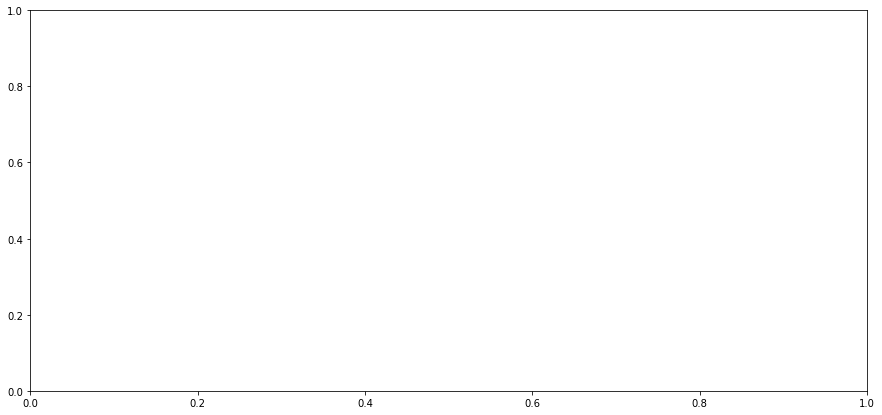

In [27]:

#metric = 'mse'
#path = '/home/hanna/MS-thesis/python_figs/test/{}.json'.format(metric)

#merged = np.random.random(  )
# TODO read score and plot those values

fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax = sns.heatmap(merged,
                 annot = True, xticklabels= x_labels,
                 yticklabels=y_labels, ax = ax)
ax.set_xlabel('Lagg')
ax.set_title('TEST MSE')
plt.yticks(rotation=0);
plt.savefig('/home/hanna/MS-thesis/python_figs/{}_score_AR_models.png'.format(metric))
